# Visualize counts of accidents in each area of Berlin

There are 12 official neighborhood (Bezirke) in Berlin. The `geojson` information the boundaries of each one is found at this [Github page](https://github.com/m-hoerz/berlin-shapes). 

Let's color each area differently proportional to the number of accidents in the area, or by the average fraction of accidents in the area that involve actors of different types.

In [1]:
INPUT_FOLDER_NAME = "/Users/abuzatu/Work/data/geo_spatial/Germany/Berlin/Accidents_Car_2019"
INPUT_FILE_NAME = f"{INPUT_FOLDER_NAME}/berlin_2019_car_accidents.pickle"
INPUT_FILE_AREA_NAME = f"{INPUT_FOLDER_NAME}/berlin-shapes/berliner-bezirke.geojson"

OUTPUT_FOLDER_NAME = "./output"

BERLIN_LAT = 52.5243700
BERLIN_LON = 13.4105300

In [2]:
import pathlib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# create output folder
pathlib.Path(OUTPUT_FOLDER_NAME).mkdir(parents=True, exist_ok=True)

In [4]:
gdf_accident = pd.read_pickle(INPUT_FILE_NAME)
gdf_accident.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
0,49090,11,12,12301203,Wittenau Süd,2019,1,13,6,3,...,0,0,0,0,1,794062.2837,5835083.823,13.34146,52.58609,POINT (13.34146 52.58609)
1,49091,11,3,3040818,Pankow Süd,2019,1,9,5,3,...,0,0,0,0,0,799130.4007,5832327.415,13.41356,52.55862,POINT (13.41356 52.55862)
2,49093,11,12,12103115,Breitkopfbecken,2019,3,21,6,3,...,0,0,0,0,0,795437.6130,5833549.454,13.36034,52.57159,POINT (13.36034 52.57159)
3,49096,11,6,6040703,Nikolassee,2019,1,7,6,2,...,1,0,0,0,1,786714.3754,5817042.137,13.21777,52.42825,POINT (13.21777 52.42825)
4,49097,11,7,7030303,Grazer Platz,2019,2,15,3,3,...,0,0,0,0,0,796074.3342,5822724.905,13.36007,52.47421,POINT (13.36007 52.47421)


In [5]:
type(gdf_accident)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

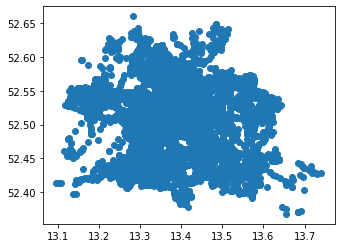

In [6]:
gdf_accident.plot()

In [7]:
# create a subset of the points, here the deadly accidents
gdf_death = gdf_accident[gdf_accident.UKATEGORIE == 1]
gdf_death.head()

,OBJECTID,LAND,BEZ,LOR,STRASSE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,geometry
60,49229,11,1,1011303,Alexanderplatzviertel,2019,2,10,4,1,...,0,0,1,0,0,799571.0120,5828269.929,13.41638,52.52200,POINT (13.41638 52.52200)
175,49811,11,10,10010309,Springpfuhl,2019,1,10,7,1,...,1,0,0,0,1,807656.0523,5829873.139,13.53666,52.53187,POINT (13.53666 52.53187)
916,50859,11,5,5020629,Börnicker Straße,2019,11,17,3,1,...,1,0,0,1,1,785375.0764,5826217.721,13.20597,52.51122,POINT (13.20597 52.51122)
1743,51741,11,2,2040502,Friedenstraße,2019,6,16,5,1,...,1,0,0,0,0,801117.5862,5827836.882,13.43872,52.51727,POINT (13.43872 52.51727)
1955,191208,11,4,4041134,Bismarckallee,2019,1,17,3,1,...,1,0,0,0,1,790860.2576,5823812.355,13.28447,52.48676,POINT (13.28447 52.48676)


Text(0.5, 1.0, 'Berlin car accidents in 2019')

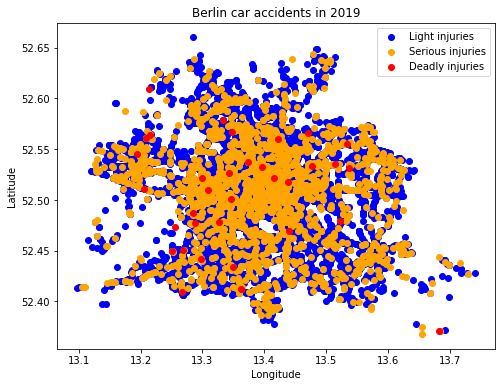

In [8]:
# let's plot the type of injuries
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
gdf_accident[gdf_accident.UKATEGORIE == 3].plot(ax = ax, label = "Light injuries", color = "blue")
gdf_accident[gdf_accident.UKATEGORIE == 2].plot(ax = ax, label = "Serious injuries", color = "orange")
gdf_accident[gdf_accident.UKATEGORIE == 1].plot(ax = ax, label = "Deadly injuries", color = "red")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Berlin car accidents in 2019")

Let's explore in more detail the 34 deadline accidents, including plotting the map of the city behind in several ways

# Berlin areas

In [9]:
gdf_areas = gpd.read_file(INPUT_FILE_AREA_NAME)
gdf_areas

,gml_id,spatial_name,spatial_alias,spatial_type,geometry
0,re_bezirke.01,01,Mitte,Polygon,"POLYGON ((13.37325 52.50377, 13.37342 52.50399..."
1,re_bezirke.02,02,Friedrichshain-Kreuzberg,Polygon,"POLYGON ((13.44471 52.49422, 13.44498 52.49443..."
2,re_bezirke.03,03,Pankow,Polygon,"POLYGON ((13.44226 52.53097, 13.44561 52.52788..."
3,re_bezirke.04,04,Charlottenburg-Wilmersdorf,Polygon,"POLYGON ((13.30748 52.46788, 13.30833 52.46754..."
4,re_bezirke.05,05,Spandau,Polygon,"POLYGON ((13.21570 52.50936, 13.21570 52.50935..."
5,re_bezirke.06,06,Steglitz-Zehlendorf,Polygon,"POLYGON ((13.26906 52.40424, 13.27045 52.40416..."
6,re_bezirke.07,07,Tempelhof-Schöneberg,Polygon,"POLYGON ((13.41802 52.37623, 13.41951 52.37618..."
7,re_bezirke.08,08,Neukölln,Polygon,"POLYGON ((13.46090 52.42075, 13.46355 52.42108..."
8,re_bezirke.09,09,Treptow-Köpenick,Polygon,"POLYGON ((13.65750 52.35191, 13.65789 52.35204..."
9,re_bezirke.10,10,Marzahn-Hellersdorf,Polygon,"POLYGON ((13.58657 52.48101, 13.58878 52.48001..."


In [10]:
def plot_areas(gdf):
    fig, ax = plt.subplots(1, 1, figsize = (10, 6))
    # plot counties
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
    gdf.plot(ax = ax, 
             facecolor=polygon_color_face,
             edgecolor=polygon_color_edge,
             linewidth = 1,
            )
    #
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.title(f"Berlin: {len(gdf)} areas (Bezirke)", fontsize = 18)

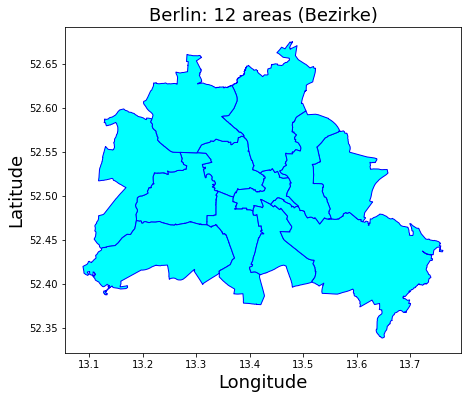

In [11]:
plot_areas(gdf_areas)

# Overlay Berlin areas and accidents

In [12]:
def plot_areas_accidents(gdf_areas, gdf_accidents):
    fig, ax = plt.subplots(1, 1, figsize = (10, 6))
    # plot counties
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
    gdf_areas.plot(ax = ax, 
             facecolor=polygon_color_face,
             edgecolor=polygon_color_edge,
             linewidth = 1,
            )
    #
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
    gdf_accidents.plot(ax = ax, 
             facecolor=polygon_color_face,
             edgecolor=polygon_color_edge,
             linewidth = 1,
            )
    #
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.title(f"Berlin: {len(gdf_areas)} areas (Bezirke)", fontsize = 18)

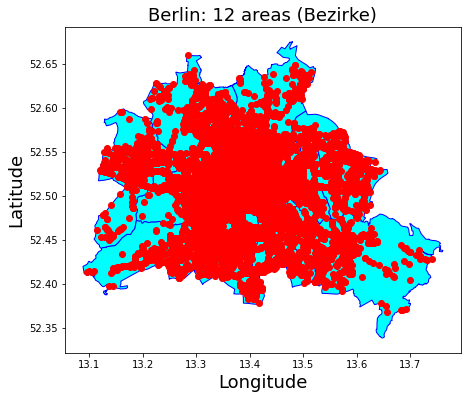

In [13]:
plot_areas_accidents(gdf_areas, gdf_accident)

# Color areas by the number of accidents

For the total, or of the different actors involved in the accident.

In [14]:
gdf_accident["Count"] = 1
gdf_accident_count = gdf_accident.groupby("BEZ").agg("count").reset_index()[["BEZ", "Count"]]
gdf_accident_count

,BEZ,Count
0,1,2215
1,2,1381
2,3,1219
3,4,1727
4,5,798
5,6,851
6,7,1241
7,8,934
8,9,892
9,10,585


In [15]:
# for gdf_areas keep fewer colums and convert the spatial_alias from string to number
gdf_areas["BEZ"] = gdf_areas["spatial_name"].map(lambda x : int(x))
gdf_area = gdf_areas[["BEZ", "spatial_alias", "geometry"]]
gdf_area

,BEZ,spatial_alias,geometry
0,1,Mitte,"POLYGON ((13.37325 52.50377, 13.37342 52.50399..."
1,2,Friedrichshain-Kreuzberg,"POLYGON ((13.44471 52.49422, 13.44498 52.49443..."
2,3,Pankow,"POLYGON ((13.44226 52.53097, 13.44561 52.52788..."
3,4,Charlottenburg-Wilmersdorf,"POLYGON ((13.30748 52.46788, 13.30833 52.46754..."
4,5,Spandau,"POLYGON ((13.21570 52.50936, 13.21570 52.50935..."
5,6,Steglitz-Zehlendorf,"POLYGON ((13.26906 52.40424, 13.27045 52.40416..."
6,7,Tempelhof-Schöneberg,"POLYGON ((13.41802 52.37623, 13.41951 52.37618..."
7,8,Neukölln,"POLYGON ((13.46090 52.42075, 13.46355 52.42108..."
8,9,Treptow-Köpenick,"POLYGON ((13.65750 52.35191, 13.65789 52.35204..."
9,10,Marzahn-Hellersdorf,"POLYGON ((13.58657 52.48101, 13.58878 52.48001..."


In [16]:
gdf_accident_count = gdf_area.merge(gdf_accident_count, on = "BEZ")
gdf_accident_count

,BEZ,spatial_alias,geometry,Count
0,1,Mitte,"POLYGON ((13.37325 52.50377, 13.37342 52.50399...",2215
1,2,Friedrichshain-Kreuzberg,"POLYGON ((13.44471 52.49422, 13.44498 52.49443...",1381
2,3,Pankow,"POLYGON ((13.44226 52.53097, 13.44561 52.52788...",1219
3,4,Charlottenburg-Wilmersdorf,"POLYGON ((13.30748 52.46788, 13.30833 52.46754...",1727
4,5,Spandau,"POLYGON ((13.21570 52.50936, 13.21570 52.50935...",798
5,6,Steglitz-Zehlendorf,"POLYGON ((13.26906 52.40424, 13.27045 52.40416...",851
6,7,Tempelhof-Schöneberg,"POLYGON ((13.41802 52.37623, 13.41951 52.37618...",1241
7,8,Neukölln,"POLYGON ((13.46090 52.42075, 13.46355 52.42108...",934
8,9,Treptow-Köpenick,"POLYGON ((13.65750 52.35191, 13.65789 52.35204...",892
9,10,Marzahn-Hellersdorf,"POLYGON ((13.58657 52.48101, 13.58878 52.48001...",585


In [17]:
type(gdf_accident_count)

geopandas.geodataframe.GeoDataFrame

In [18]:
def plot_area_colored_by_value(gdf, var, title, scale):
    dynamic_cmap = "hot"
    dynamic_linewidth = 0.4
    vmin = np.min(gdf[var].values)
    vmax = np.max(gdf[var].values)
    print(f"for real:  vmin={vmin:.3f}, vmax={vmax:.3f}")
    if scale == None:
        pass
    else:
        vmin, vmax = scale
    print(f"for scale: vmin={vmin:.3f}, vmax={vmax:.3f}")
    fig, ax = plt.subplots(1, 1, figsize = (10, 6))   
    #
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.title(f"Berlin areas in 2019 by {title}", fontsize = 18)
    #
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gdf.plot(
        ax=ax,
        column=var,
        cmap=dynamic_cmap,
        legend=True,
        cax=cax,
        vmin=vmin,
        vmax=vmax,
        linewidth=dynamic_linewidth,
        zorder=15,
    )

for real:  vmin=585.000, vmax=2215.000
for scale: vmin=585.000, vmax=2215.000


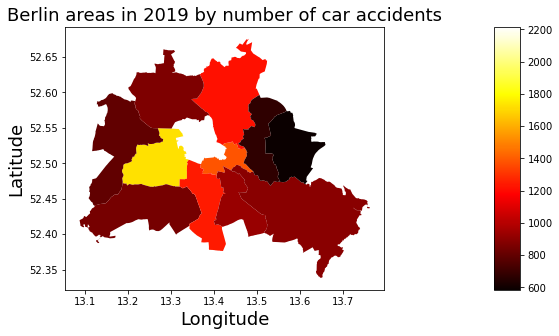

In [19]:
plot_area_colored_by_value(gdf_accident_count, "Count", "number of car accidents", scale = None)

# Redo for the fraction of accidents in each area 

that have a certain actor involved

In [20]:
gdf_accident["Count"] = 1
gdf_accident
gdf_accident_mean = gdf_accident.groupby("BEZ").agg("mean").reset_index()
gdf_accident_mean

,BEZ,OBJECTID,LAND,LOR,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,Count
0,1,179004.957111,11.0,1.038622e+06,2019.0,6.759368,13.720993,4.079458,2.877652,3.362077,...,0.140858,0.152596,0.035214,0.158014,0.241986,796924.299456,5.828920e+06,13.378068,52.529276,1.0
1,2,173445.419986,11.0,2.044076e+06,2019.0,6.736423,13.456191,4.119479,2.875453,3.419261,...,0.142650,0.151340,0.028240,0.140478,0.236785,800287.697734,5.826305e+06,13.425147,52.503997,1.0
2,3,163989.038556,11.0,3.056941e+06,2019.0,6.662838,13.191140,4.124692,2.866284,3.624282,...,0.136998,0.121411,0.036095,0.141099,0.219852,800243.798209,5.832933e+06,13.430489,52.563432,1.0
3,4,169637.151708,11.0,4.043908e+06,2019.0,6.669369,13.376954,4.104227,2.853503,3.476549,...,0.131442,0.158657,0.038796,0.105385,0.231616,791951.432061,5.825967e+06,13.302381,52.505489,1.0
4,5,191074.951128,11.0,5.019185e+06,2019.0,6.546366,13.175439,4.129073,2.794486,3.525063,...,0.159148,0.162907,0.030075,0.145363,0.226817,784569.933850,5.828778e+06,13.196334,52.534594,1.0
5,6,181295.542891,11.0,6.026583e+06,2019.0,6.725029,13.638073,4.047004,2.816686,3.445358,...,0.126910,0.160987,0.027027,0.108108,0.301998,791802.113569,5.818535e+06,13.293692,52.438934,1.0
6,7,159959.715552,11.0,7.033981e+06,2019.0,6.758259,13.559226,4.226430,2.842063,3.439162,...,0.153102,0.158743,0.033844,0.154714,0.241741,796976.339974,5.821128e+06,13.371881,52.459404,1.0
7,8,194662.509636,11.0,8.006024e+06,2019.0,6.776231,13.840471,4.064240,2.873662,3.644540,...,0.172377,0.152034,0.025696,0.147752,0.258030,801974.695378,5.821366e+06,13.445443,52.458795,1.0
8,9,184008.205157,11.0,9.027677e+06,2019.0,6.736547,12.958520,4.015695,2.819507,3.713004,...,0.140135,0.125561,0.043722,0.143498,0.221973,808685.757649,5.820650e+06,13.543234,52.448622,1.0
9,10,178384.916239,11.0,1.003506e+07,2019.0,6.601709,13.519658,4.172650,2.793162,3.820513,...,0.164103,0.123077,0.030769,0.155556,0.251282,810339.618625,5.829581e+06,13.575819,52.527727,1.0


In [21]:
gdf_accident_mean = gdf_area.merge(gdf_accident_mean, on = "BEZ")
gdf_accident_mean

,BEZ,spatial_alias,geometry,OBJECTID,LAND,LOR,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,Count
0,1,Mitte,"POLYGON ((13.37325 52.50377, 13.37342 52.50399...",179004.957111,11.0,1.038622e+06,2019.0,6.759368,13.720993,4.079458,...,0.140858,0.152596,0.035214,0.158014,0.241986,796924.299456,5.828920e+06,13.378068,52.529276,1.0
1,2,Friedrichshain-Kreuzberg,"POLYGON ((13.44471 52.49422, 13.44498 52.49443...",173445.419986,11.0,2.044076e+06,2019.0,6.736423,13.456191,4.119479,...,0.142650,0.151340,0.028240,0.140478,0.236785,800287.697734,5.826305e+06,13.425147,52.503997,1.0
2,3,Pankow,"POLYGON ((13.44226 52.53097, 13.44561 52.52788...",163989.038556,11.0,3.056941e+06,2019.0,6.662838,13.191140,4.124692,...,0.136998,0.121411,0.036095,0.141099,0.219852,800243.798209,5.832933e+06,13.430489,52.563432,1.0
3,4,Charlottenburg-Wilmersdorf,"POLYGON ((13.30748 52.46788, 13.30833 52.46754...",169637.151708,11.0,4.043908e+06,2019.0,6.669369,13.376954,4.104227,...,0.131442,0.158657,0.038796,0.105385,0.231616,791951.432061,5.825967e+06,13.302381,52.505489,1.0
4,5,Spandau,"POLYGON ((13.21570 52.50936, 13.21570 52.50935...",191074.951128,11.0,5.019185e+06,2019.0,6.546366,13.175439,4.129073,...,0.159148,0.162907,0.030075,0.145363,0.226817,784569.933850,5.828778e+06,13.196334,52.534594,1.0
5,6,Steglitz-Zehlendorf,"POLYGON ((13.26906 52.40424, 13.27045 52.40416...",181295.542891,11.0,6.026583e+06,2019.0,6.725029,13.638073,4.047004,...,0.126910,0.160987,0.027027,0.108108,0.301998,791802.113569,5.818535e+06,13.293692,52.438934,1.0
6,7,Tempelhof-Schöneberg,"POLYGON ((13.41802 52.37623, 13.41951 52.37618...",159959.715552,11.0,7.033981e+06,2019.0,6.758259,13.559226,4.226430,...,0.153102,0.158743,0.033844,0.154714,0.241741,796976.339974,5.821128e+06,13.371881,52.459404,1.0
7,8,Neukölln,"POLYGON ((13.46090 52.42075, 13.46355 52.42108...",194662.509636,11.0,8.006024e+06,2019.0,6.776231,13.840471,4.064240,...,0.172377,0.152034,0.025696,0.147752,0.258030,801974.695378,5.821366e+06,13.445443,52.458795,1.0
8,9,Treptow-Köpenick,"POLYGON ((13.65750 52.35191, 13.65789 52.35204...",184008.205157,11.0,9.027677e+06,2019.0,6.736547,12.958520,4.015695,...,0.140135,0.125561,0.043722,0.143498,0.221973,808685.757649,5.820650e+06,13.543234,52.448622,1.0
9,10,Marzahn-Hellersdorf,"POLYGON ((13.58657 52.48101, 13.58878 52.48001...",178384.916239,11.0,1.003506e+07,2019.0,6.601709,13.519658,4.172650,...,0.164103,0.123077,0.030769,0.155556,0.251282,810339.618625,5.829581e+06,13.575819,52.527727,1.0


for real:  vmin=0.218, vmax=0.516
for scale: vmin=0.000, vmax=1.000


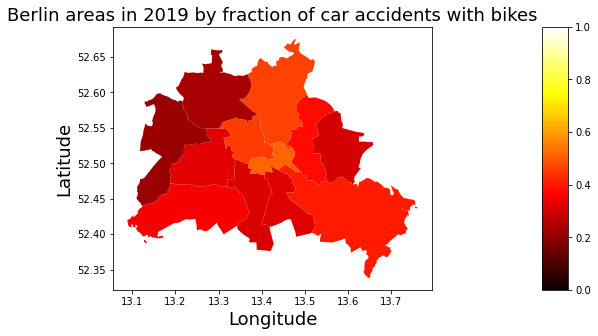

In [22]:
plot_area_colored_by_value(gdf_accident_mean, "IstRad", "fraction of car accidents with bikes", scale = (0, 1))

for real:  vmin=0.121, vmax=0.163
for scale: vmin=0.000, vmax=1.000


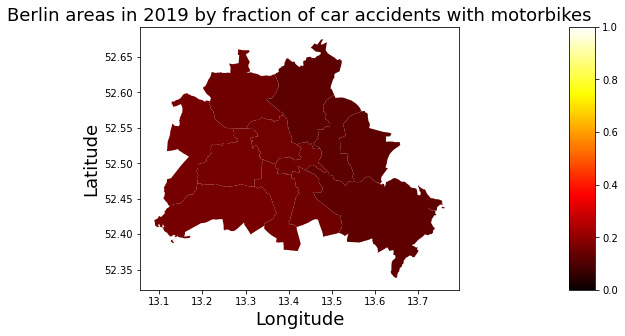

In [23]:
plot_area_colored_by_value(gdf_accident_mean, "IstKrad", "fraction of car accidents with motorbikes", scale = (0, 1))

for real:  vmin=0.127, vmax=0.186
for scale: vmin=0.000, vmax=1.000


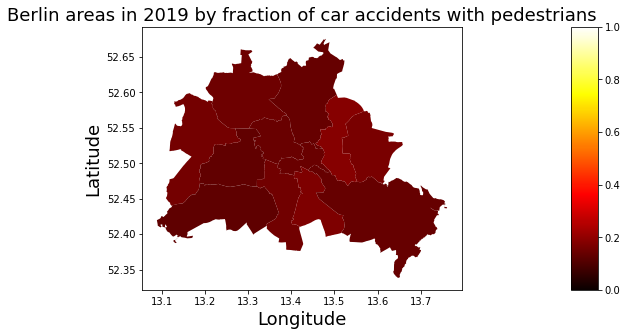

In [24]:
plot_area_colored_by_value(gdf_accident_mean, "IstFuss", "fraction of car accidents with pedestrians", scale = (0, 1))

for real:  vmin=0.752, vmax=0.881
for scale: vmin=0.000, vmax=1.000


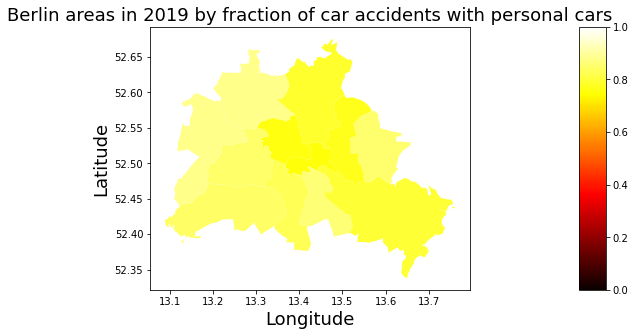

In [25]:
plot_area_colored_by_value(gdf_accident_mean, "IstPKW", "fraction of car accidents with personal cars", scale = (0, 1))

for real:  vmin=0.026, vmax=0.056
for scale: vmin=0.000, vmax=1.000


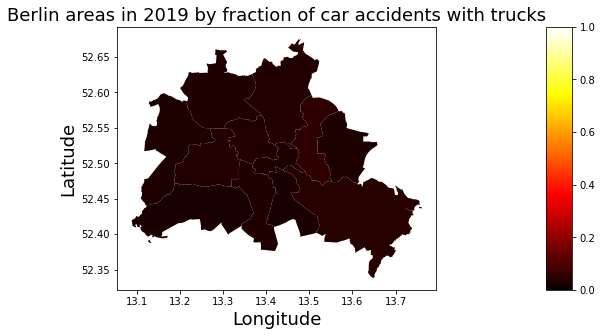

In [26]:
plot_area_colored_by_value(gdf_accident_mean, "IstGkfz", "fraction of car accidents with trucks", scale = (0, 1))

for real:  vmin=0.105, vmax=0.172
for scale: vmin=0.000, vmax=1.000


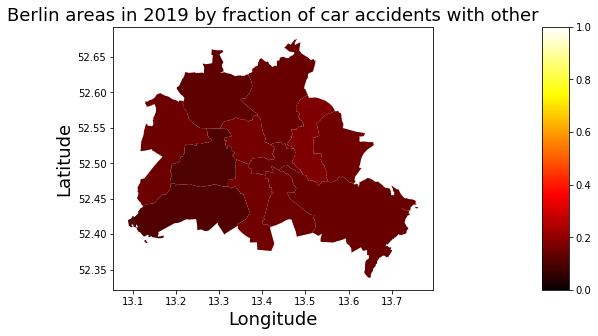

In [27]:
plot_area_colored_by_value(gdf_accident_mean, "IstSonstige", "fraction of car accidents with other", scale = (0, 1))